In [1]:
!wget -N https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv

--2021-06-16 15:20:47--  https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv
Resolving data.rivm.nl (data.rivm.nl)... 2001:610:430:ffff::16:198, 131.224.250.75
Connecting to data.rivm.nl (data.rivm.nl)|2001:610:430:ffff::16:198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147281565 (140M) [text/csv]
Saving to: ‘COVID-19_casus_landelijk.csv’

COVID-19_casus_land 100%[===================>] 140.46M  7.13MB/s    in 20s     

2021-06-16 15:21:07 (6.87 MB/s) - ‘COVID-19_casus_landelijk.csv’ saved [147281565/147281565]



In [2]:
import pandas as pd
import numpy  as np

from pyearth import Earth
from pyearth import export

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

%matplotlib inline

In [3]:
df = pd.read_csv('COVID-19_casus_landelijk.csv', sep=';', parse_dates=[0, 1], infer_datetime_format=True)
df

Date_file Date_statistics Date_statistics_type Agegroup  \
0       2021-06-16 10:00:00      2020-01-01                  DOO    40-49   
1       2021-06-16 10:00:00      2020-01-01                  DOO    50-59   
2       2021-06-16 10:00:00      2020-01-01                  DOO    20-29   
3       2021-06-16 10:00:00      2020-01-01                  DOO    60-69   
4       2021-06-16 10:00:00      2020-01-04                  DOO    10-19   
...                     ...             ...                  ...      ...   
1675639 2021-06-16 10:00:00      2021-06-16                  DPL    40-49   
1675640 2021-06-16 10:00:00      2021-06-16                  DPL    10-19   
1675641 2021-06-16 10:00:00      2021-06-16                  DPL    20-29   
1675642 2021-06-16 10:00:00      2021-06-16                  DPL    20-29   
1675643 2021-06-16 10:00:00      2021-06-16                  DON    20-29   

            Sex       Province Hospital_admission Deceased  Week_of_death  \
0        Female  Noord-Holland                 No       No            NaN   
1          Male     Gelderland                 No       No            NaN   
2        Female   Zuid-Holland                 No       No            NaN   
3        Female  Noord-Holland                 No       No            NaN   
4        Female     Gelderland            Unknown       No            NaN   
...         ...            ...                ...      ...            ...   
1675639  Female        Utrecht                 No  Unknown            NaN   
1675640  Female  Noord-Holland            Unknown  Unknown            NaN   
1675641    Male  Noord-Holland            Unknown  Unknown            NaN   
1675642    Male  Noord-Holland            Unknown  Unknown            NaN   
1675643    Male     Gelderland            Unknown  Unknown            NaN   

                                  Municipal_health_service  
0                                            GGD Amsterdam  
1        Veiligheids- en Gezondheidsregio Gelderland-Mi...  
2                                      GGD Hollands-Midden  
3                                     GGD Hollands-Noorden  
4                                      GGD Gelderland-Zuid  
...                                                    ...  
1675639                                  GGD Regio Utrecht  
1675640                                   GGD Kennemerland  
1675641                                      GGD Amsterdam  
1675642                                      GGD Amsterdam  
1675643  Veiligheids- en Gezondheidsregio Gelderland-Mi...  

[1675644 rows x 10 columns]

In [4]:
df.count()

Date_file                   1675644
Date_statistics             1675644
Date_statistics_type        1675644
Agegroup                    1675644
Sex                         1675644
Province                    1675644
Hospital_admission          1675644
Deceased                    1675644
Week_of_death                 17718
Municipal_health_service    1675644
dtype: int64

In [5]:
daterep = 'Date_statistics'
region  = 'Agegroup'
cases   = 'cases'
deaths  = 'Deceased'

lastdate = df[daterep].max() - pd.Timedelta('7 days')

df[cases]  = 1
df[deaths] = df[deaths].apply(lambda x: 1 if x == 'Yes' else 0)
df

Date_file Date_statistics Date_statistics_type Agegroup  \
0       2021-06-16 10:00:00      2020-01-01                  DOO    40-49   
1       2021-06-16 10:00:00      2020-01-01                  DOO    50-59   
2       2021-06-16 10:00:00      2020-01-01                  DOO    20-29   
3       2021-06-16 10:00:00      2020-01-01                  DOO    60-69   
4       2021-06-16 10:00:00      2020-01-04                  DOO    10-19   
...                     ...             ...                  ...      ...   
1675639 2021-06-16 10:00:00      2021-06-16                  DPL    40-49   
1675640 2021-06-16 10:00:00      2021-06-16                  DPL    10-19   
1675641 2021-06-16 10:00:00      2021-06-16                  DPL    20-29   
1675642 2021-06-16 10:00:00      2021-06-16                  DPL    20-29   
1675643 2021-06-16 10:00:00      2021-06-16                  DON    20-29   

            Sex       Province Hospital_admission  Deceased  Week_of_death  \
0        Female  Noord-Holland                 No         0            NaN   
1          Male     Gelderland                 No         0            NaN   
2        Female   Zuid-Holland                 No         0            NaN   
3        Female  Noord-Holland                 No         0            NaN   
4        Female     Gelderland            Unknown         0            NaN   
...         ...            ...                ...       ...            ...   
1675639  Female        Utrecht                 No         0            NaN   
1675640  Female  Noord-Holland            Unknown         0            NaN   
1675641    Male  Noord-Holland            Unknown         0            NaN   
1675642    Male  Noord-Holland            Unknown         0            NaN   
1675643    Male     Gelderland            Unknown         0            NaN   

                                  Municipal_health_service  cases  
0                                            GGD Amsterdam      1  
1        Veiligheids- en Gezondheidsregio Gelderland-Mi...      1  
2                                      GGD Hollands-Midden      1  
3                                     GGD Hollands-Noorden      1  
4                                      GGD Gelderland-Zuid      1  
...                                                    ...    ...  
1675639                                  GGD Regio Utrecht      1  
1675640                                   GGD Kennemerland      1  
1675641                                      GGD Amsterdam      1  
1675642                                      GGD Amsterdam      1  
1675643  Veiligheids- en Gezondheidsregio Gelderland-Mi...      1  

[1675644 rows x 11 columns]

In [6]:
df_geo = df.pivot_table(index=daterep, columns=region, values=[cases, deaths], aggfunc='sum').fillna(0)
df_geo['cases']

Agegroup          0-9  10-19  20-29  30-39  40-49  50-59  60-69  70-79  80-89  \
Date_statistics                                                                 
2020-01-01        0.0    0.0    1.0    0.0    1.0    1.0    1.0    0.0    0.0   
2020-01-04        0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2020-01-06        0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
2020-01-16        1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2020-01-20        1.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
...               ...    ...    ...    ...    ...    ...    ...    ...    ...   
2021-06-12       75.0  212.0  124.0  102.0   83.0   63.0   17.0    8.0    6.0   
2021-06-13       61.0  206.0   80.0   95.0   85.0   64.0   22.0    8.0    7.0   
2021-06-14       42.0  155.0   81.0   53.0   45.0   51.0    8.0   10.0    7.0   
2021-06-15       49.0  233.0  123.0   80.0   77.0   82.0   20.0    6.0    6.0   
2021-06-16        5.0   21.0   16.0   11.0    6.0    3.0    1.0    1.0    0.0   

Agegroup         90+  <50  Unknown  
Date_statistics                     
2020-01-01       0.0  0.0      0.0  
2020-01-04       0.0  0.0      0.0  
2020-01-06       0.0  0.0      0.0  
2020-01-16       0.0  0.0      0.0  
2020-01-20       0.0  0.0      0.0  
...              ...  ...      ...  
2021-06-12       2.0  0.0      0.0  
2021-06-13       1.0  0.0      0.0  
2021-06-14       2.0  0.0      0.0  
2021-06-15       1.0  0.0      0.0  
2021-06-16       0.0  0.0      0.0  

[509 rows x 12 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [7]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

Deceased                                                       ...  \
Agegroup        0-9 10-19 20-29 30-39 40-49 50-59 60-69 70-79 80-89  90+  ...   
2020-01-01      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...   
2020-01-02      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2020-01-03      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2020-01-04      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...   
2020-01-05      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
...             ...   ...   ...   ...   ...   ...   ...   ...   ...  ...  ...   
2022-06-12      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2022-06-13      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2022-06-14      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2022-06-15      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   
2022-06-16      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  ...   

           cases                                                        
Agegroup   20-29 30-39 40-49 50-59 60-69 70-79 80-89  90+  <50 Unknown  
2020-01-01   1.0   0.0   1.0   1.0   1.0   0.0   0.0  0.0  0.0     0.0  
2020-01-02   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
2020-01-03   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
2020-01-04   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0     0.0  
2020-01-05   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
...          ...   ...   ...   ...   ...   ...   ...  ...  ...     ...  
2022-06-12   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
2022-06-13   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
2022-06-14   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
2022-06-15   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  
2022-06-16   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN  NaN     NaN  

[898 rows x 24 columns]

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [8]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    898.000000
mean     448.500000
std      259.374568
min        0.000000
25%      224.250000
50%      448.500000
75%      672.750000
max      897.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [9]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [10]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

Running multiple wave analysis for '0-9'
Minimum number of cases is 2
Wave 01 beta 10.240 mu  84 fit 0.794 peak 2020-03-25 from 2020-03-13 to 2020-04-15 size 88
Wave 02 beta 10.211 mu 157 fit 0.876 peak 2020-06-06 from 2020-05-22 to 2020-07-05 size 183
Wave 03 beta 18.703 mu 222 fit 0.775 peak 2020-08-10 from 2020-07-14 to 2020-10-01 size 313
Wave 04 beta  8.678 mu 256 fit 0.855 peak 2020-09-13 from 2020-08-29 to 2020-10-15 size 365
Wave 05 beta  8.257 mu 278 fit 0.894 peak 2020-10-05 from 2020-09-21 to 2020-11-06 size 381
Wave 06 beta 13.381 mu 299 fit 0.903 peak 2020-10-26 from 2020-09-30 to 2021-01-02 size 2083
Wave 07 beta  7.675 mu 323 fit 0.892 peak 2020-11-19 from 2020-11-06 to 2020-12-26 size 823
Wave 08 beta 15.169 mu 353 fit 0.860 peak 2020-12-19 from 2020-11-17 to 2021-03-22 size 6851
Wave 09 beta 19.592 mu 402 fit 0.774 peak 2021-02-06 from 2020-12-28 to 2021-05-30 size 6313
Wave 10 beta  3.134 mu 350 fit 0.520 peak 2020-12-16 from 2020-12-11 to 2020-12-28 size 114
Wave 11 

Wave 16 beta  8.367 mu 294 fit 0.916 peak 2020-10-21 from 2020-10-02 to 2020-12-23 size 14819
Wave 17 beta  6.861 mu 302 fit 0.947 peak 2020-10-29 from 2020-10-14 to 2020-12-17 size 8373
Wave 18 beta  5.335 mu 313 fit 0.885 peak 2020-11-09 from 2020-10-29 to 2020-12-14 size 3760
Wave 19 beta  4.982 mu 320 fit 0.913 peak 2020-11-16 from 2020-11-06 to 2020-12-21 size 4702
Wave 20 beta  6.881 mu 331 fit 0.916 peak 2020-11-27 from 2020-11-12 to 2021-01-15 size 8537
Wave 21 beta  9.438 mu 347 fit 0.958 peak 2020-12-13 from 2020-11-22 to 2021-02-26 size 23571
Wave 22 beta  5.665 mu 353 fit 0.931 peak 2020-12-19 from 2020-12-07 to 2021-01-30 size 8108
Wave 23 beta  5.061 mu 360 fit 0.949 peak 2020-12-26 from 2020-12-15 to 2021-01-30 size 4795
Wave 24 beta  6.592 mu 371 fit 0.921 peak 2021-01-06 from 2020-12-23 to 2021-02-24 size 10441
Wave 25 beta  6.942 mu 385 fit 0.899 peak 2021-01-20 from 2021-01-05 to 2021-03-11 size 8292
Wave 26 beta  4.999 mu 393 fit 0.907 peak 2021-01-28 from 2021-01-1

Wave 17 beta  8.685 mu 355 fit 0.942 peak 2020-12-21 from 2020-12-01 to 2021-02-28 size 24527
Wave 18 beta  4.615 mu 369 fit 0.903 peak 2021-01-04 from 2020-12-25 to 2021-02-04 size 4076
Wave 19 beta  6.960 mu 381 fit 0.915 peak 2021-01-16 from 2021-01-01 to 2021-03-06 size 7647
Wave 20 beta  6.005 mu 391 fit 0.901 peak 2021-01-26 from 2021-01-14 to 2021-03-07 size 4163
Wave 21 beta  5.483 mu 401 fit 0.911 peak 2021-02-05 from 2021-01-25 to 2021-03-12 size 2897
Wave 22 beta  5.044 mu 408 fit 0.917 peak 2021-02-12 from 2021-02-02 to 2021-03-17 size 2698
Wave 23 beta  5.623 mu 418 fit 0.905 peak 2021-02-22 from 2021-02-10 to 2021-04-01 size 4596
Wave 24 beta 10.527 mu 434 fit 0.933 peak 2021-03-10 from 2021-02-15 to 2021-05-23 size 10704
Wave 25 beta 11.380 mu 452 fit 0.936 peak 2021-03-28 from 2021-03-03 to 2021-06-18 size 13925
Wave 26 beta 13.985 mu 477 fit 0.934 peak 2021-04-22 from 2021-03-22 to 2021-07-31 size 17801
Wave 27 beta 10.063 mu 491 fit 0.951 peak 2021-05-06 from 2021-04-

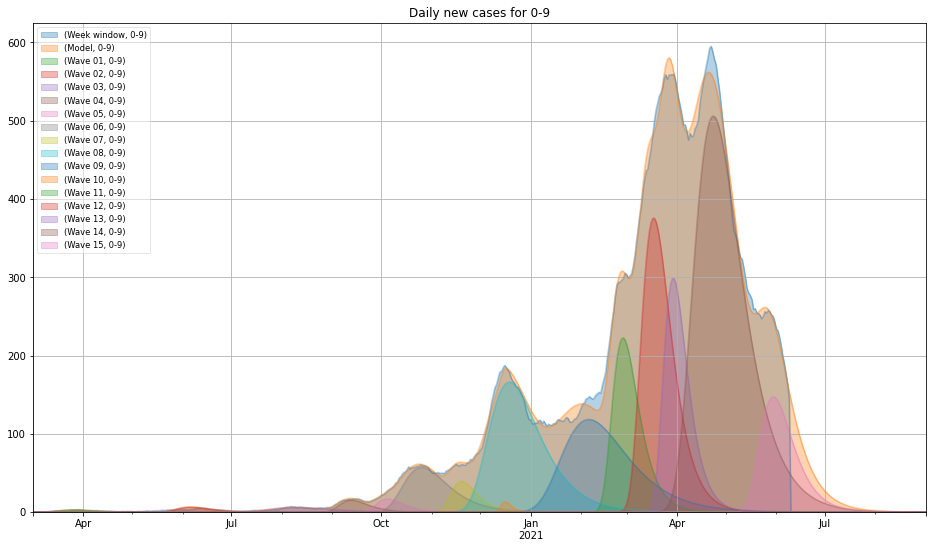

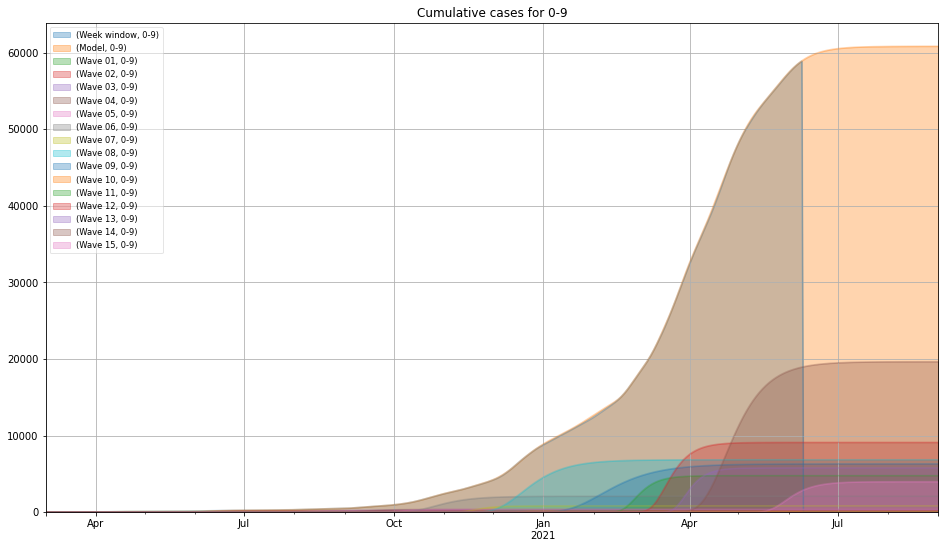

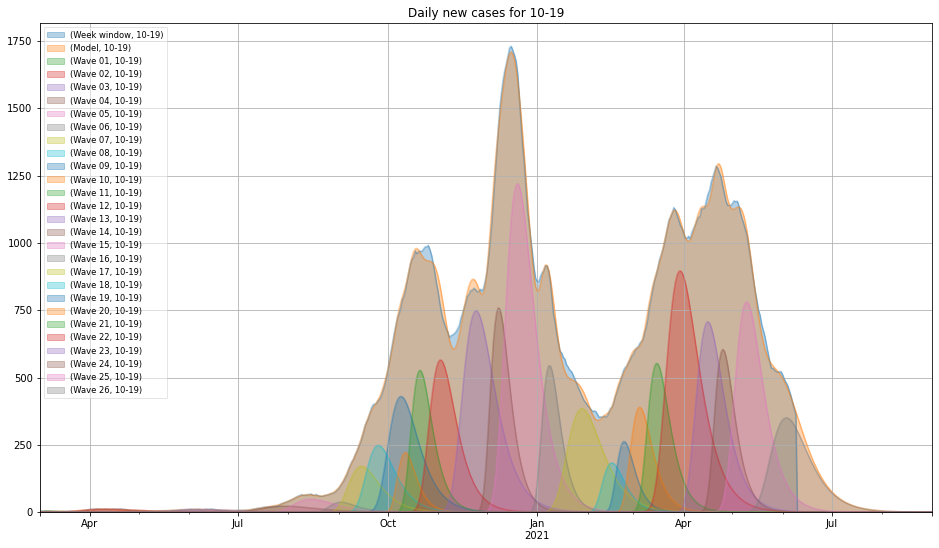

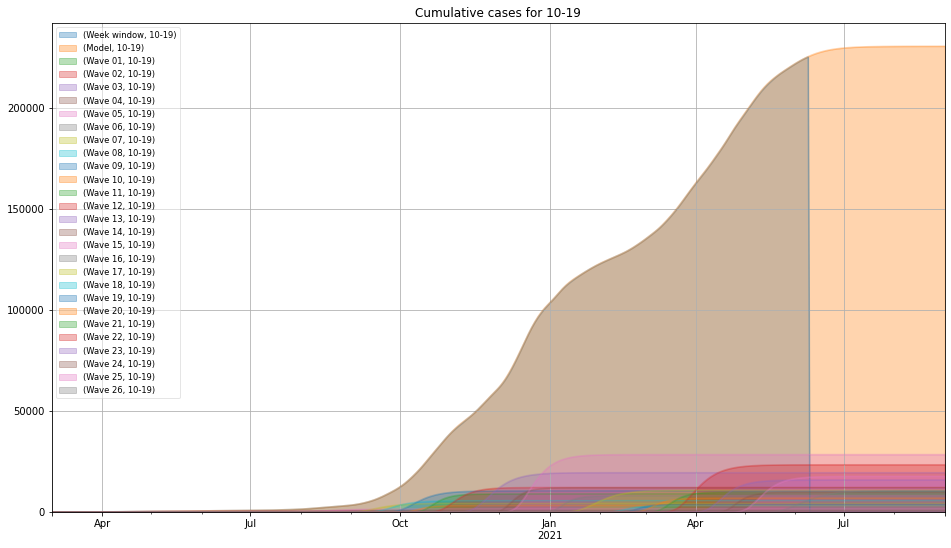

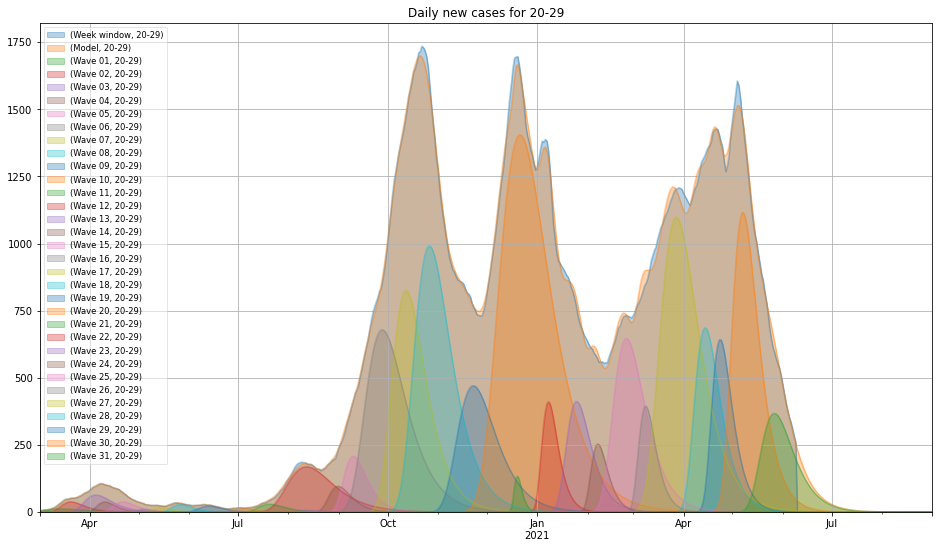

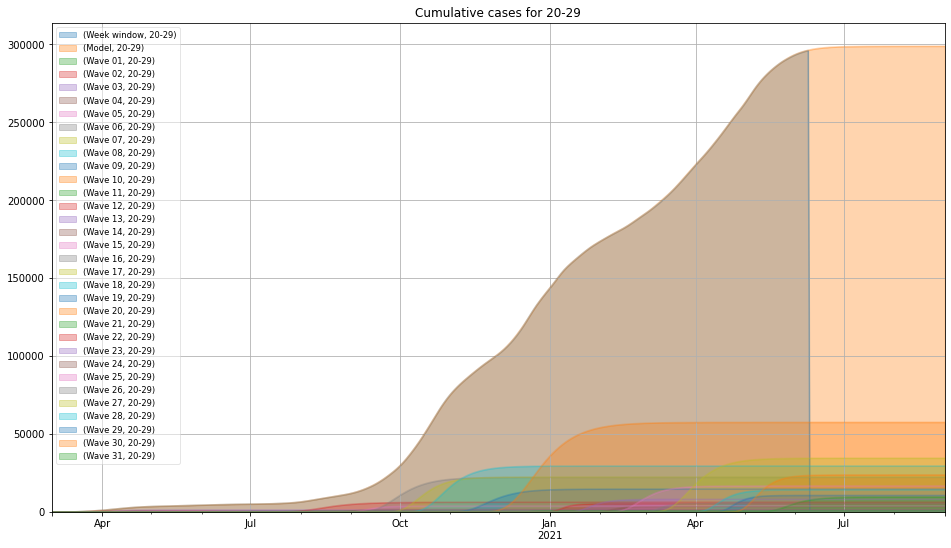

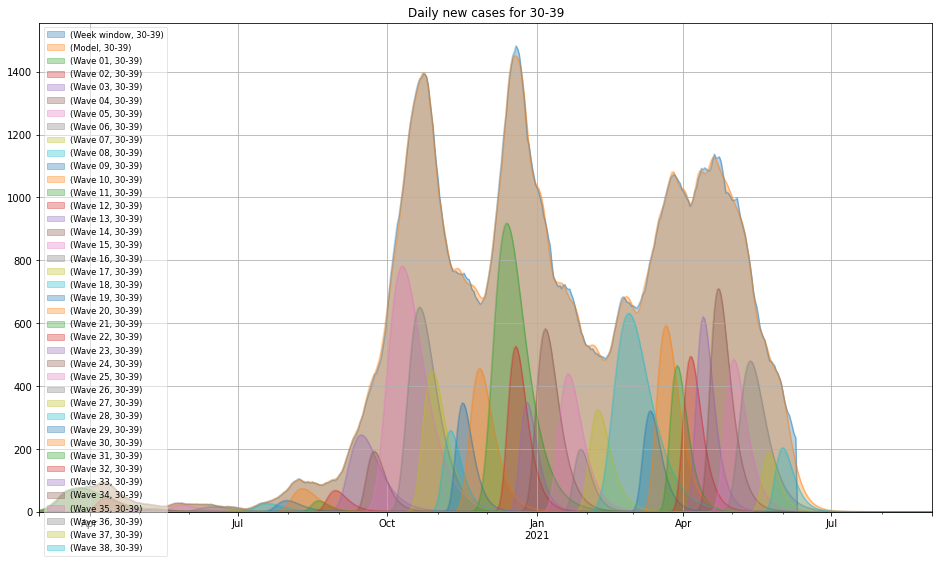

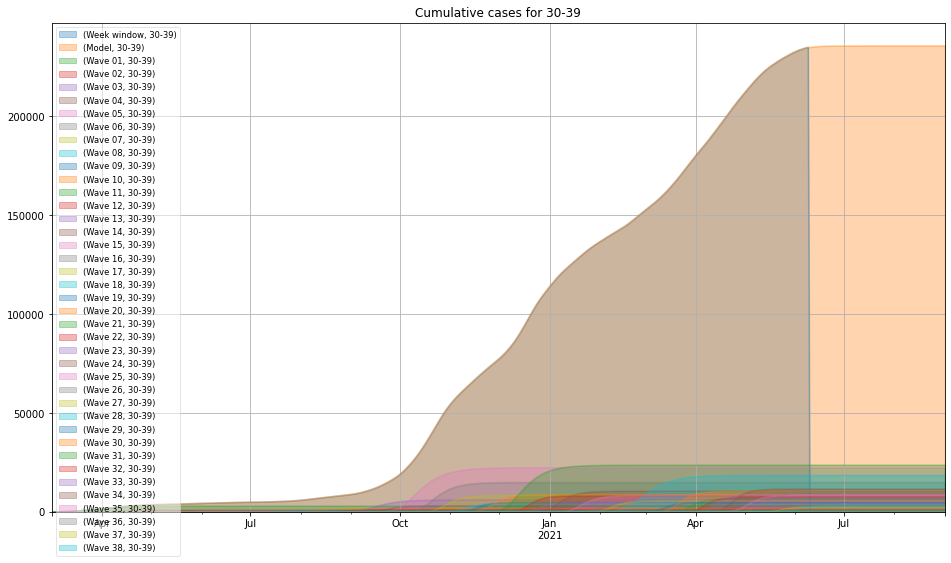

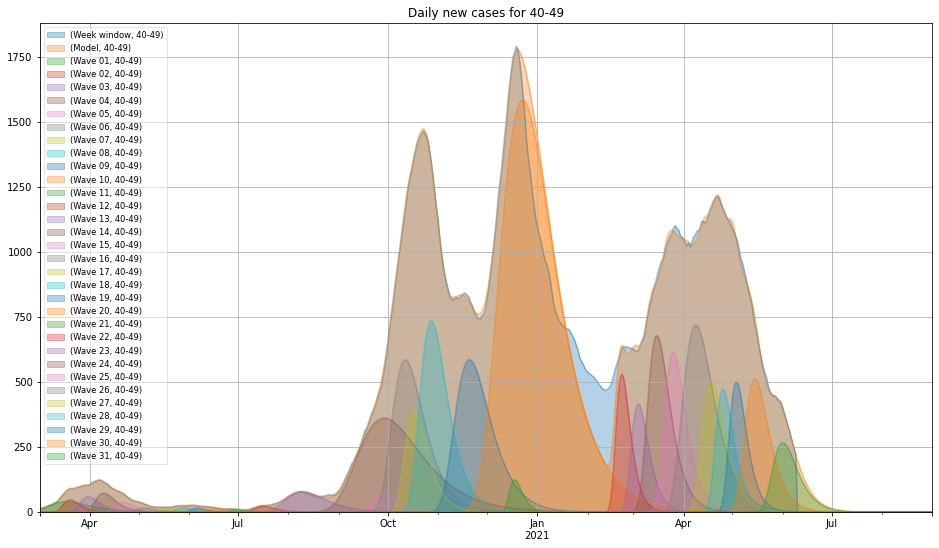

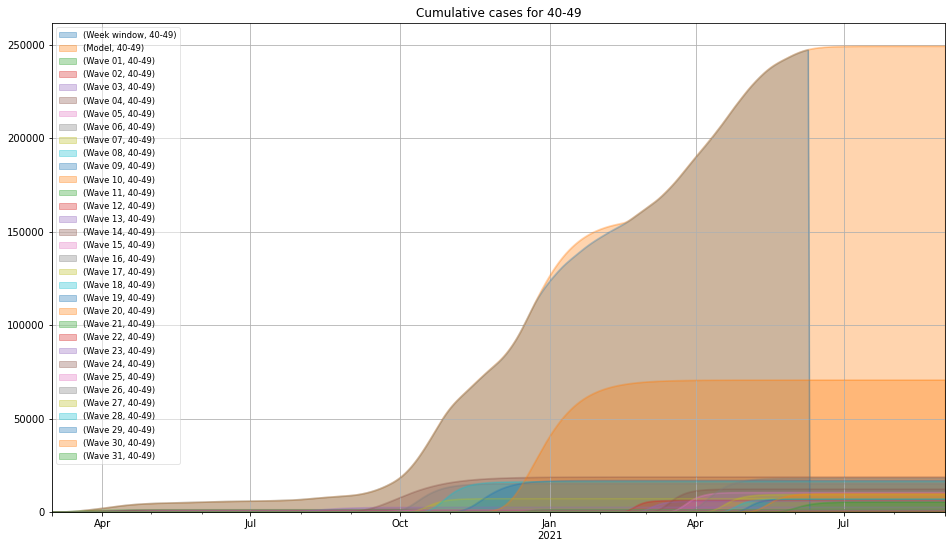

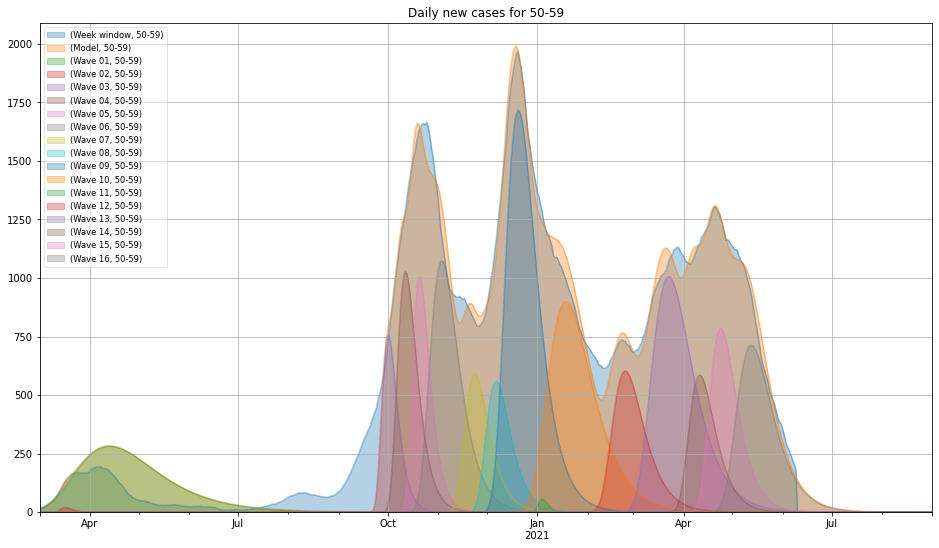

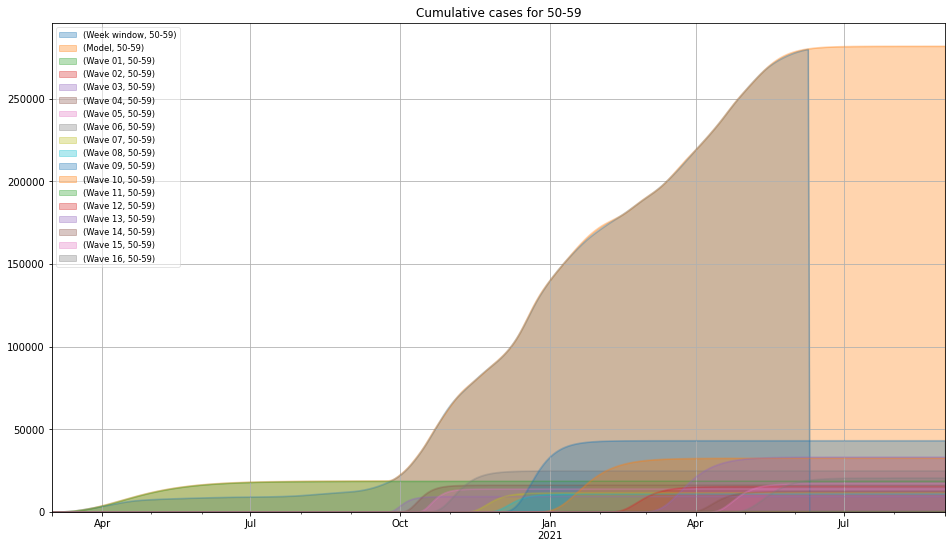

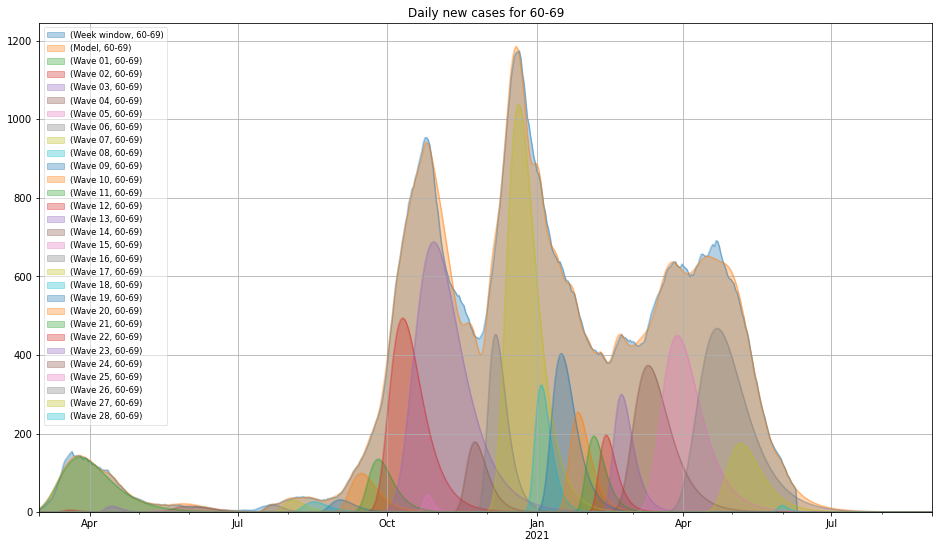

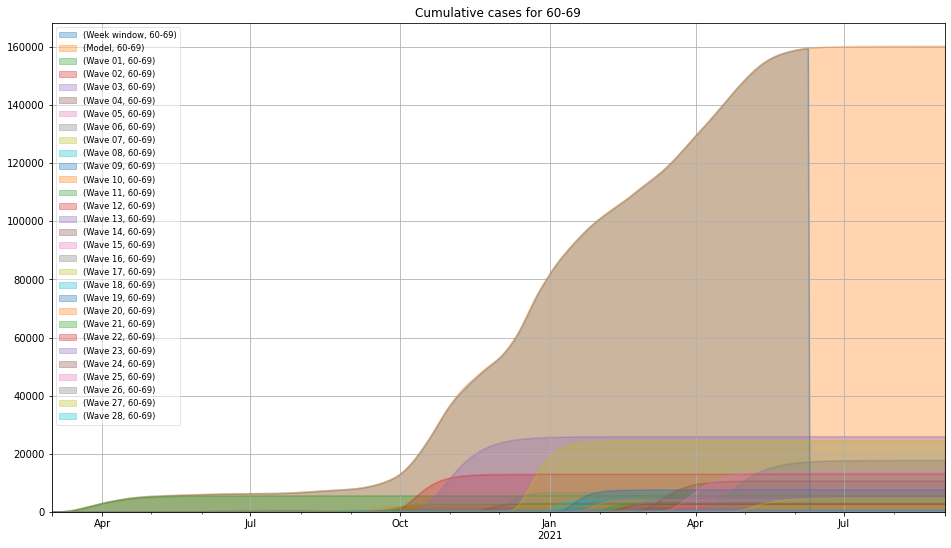

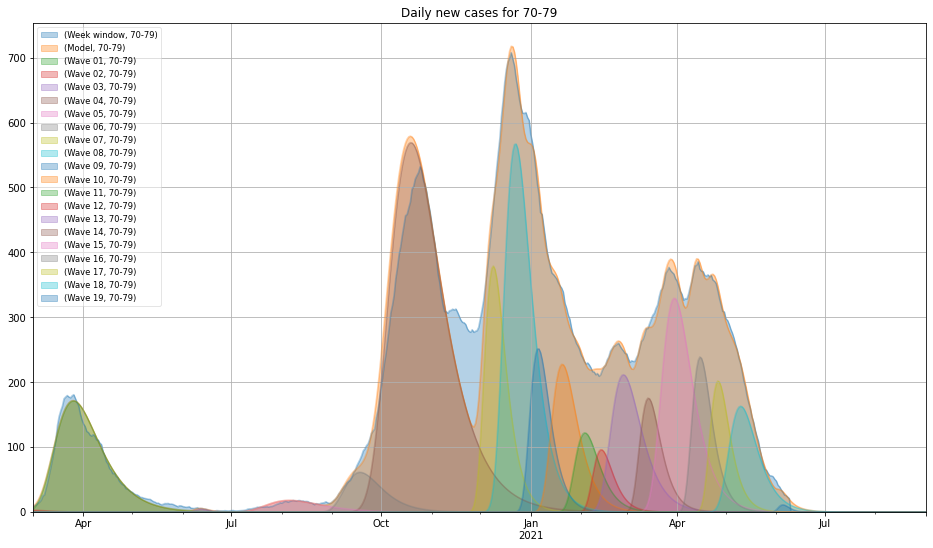

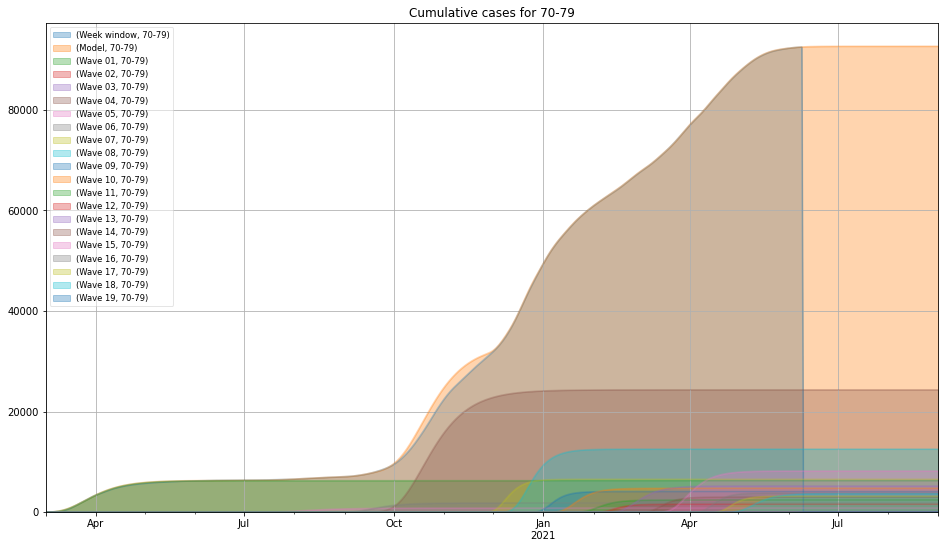

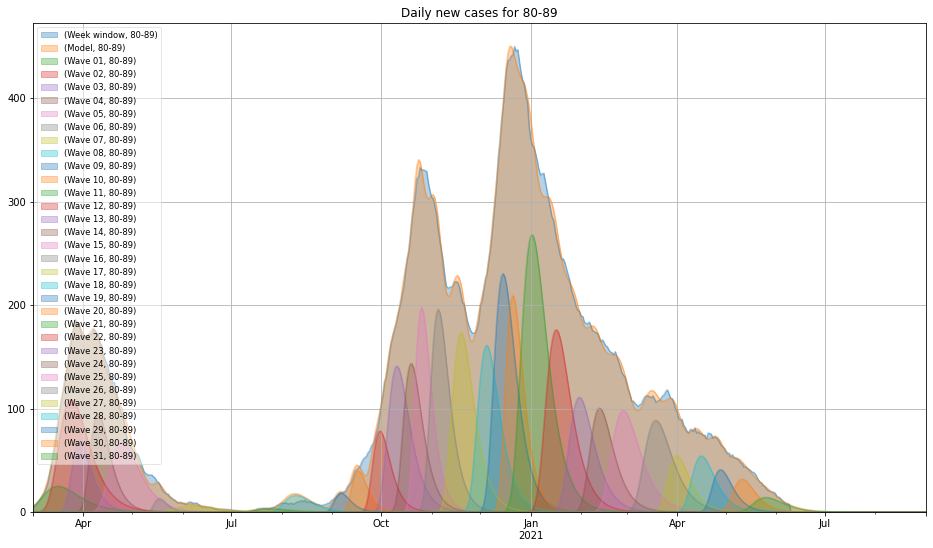

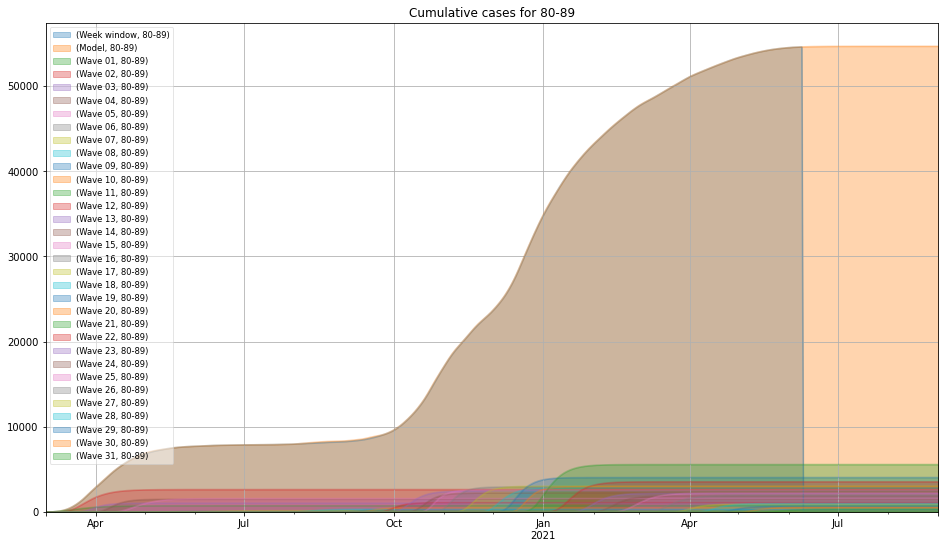

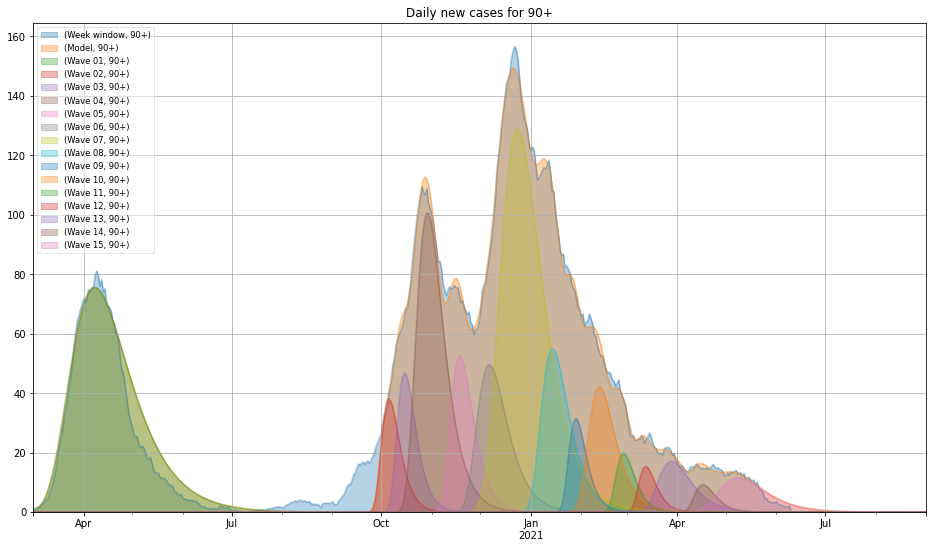

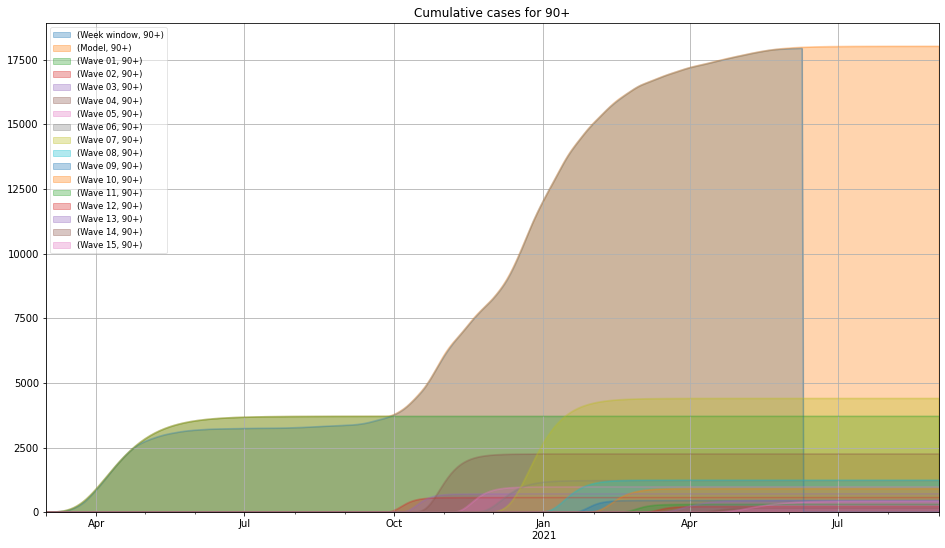

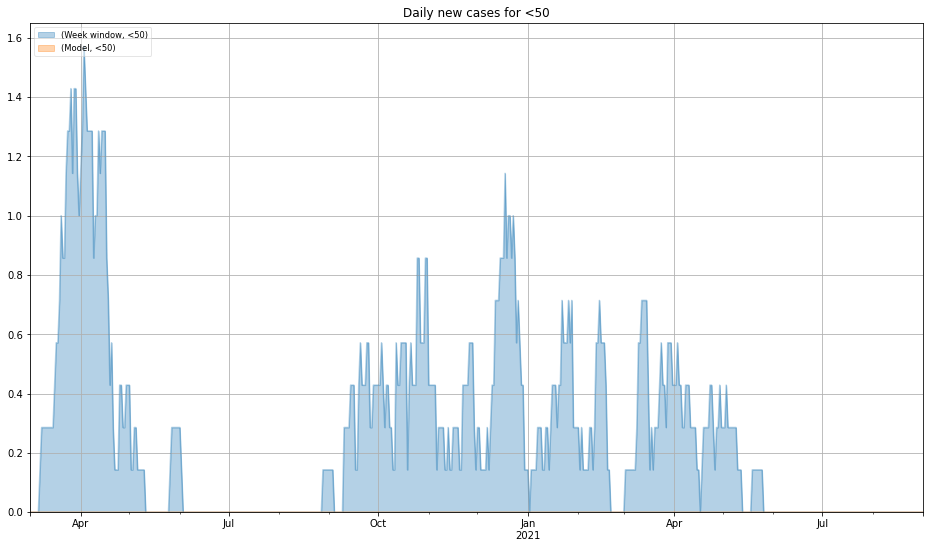

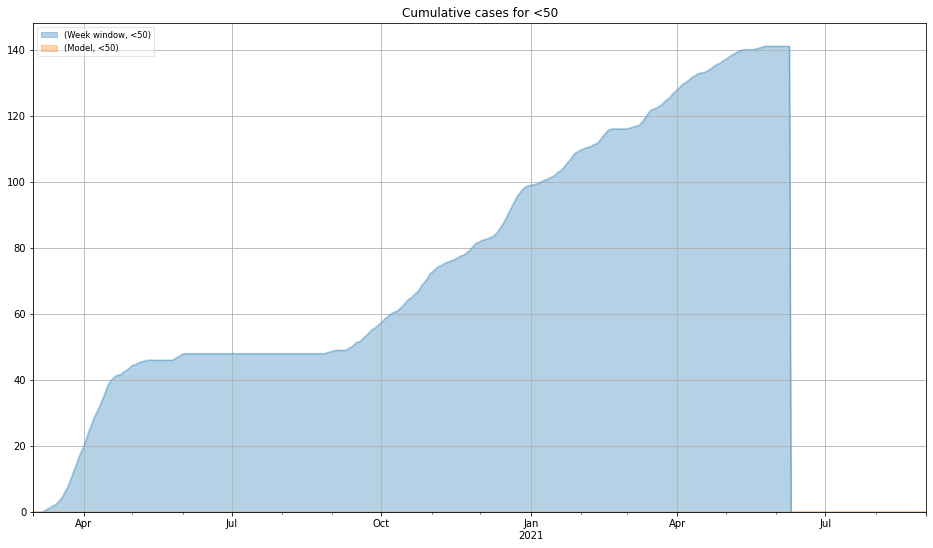

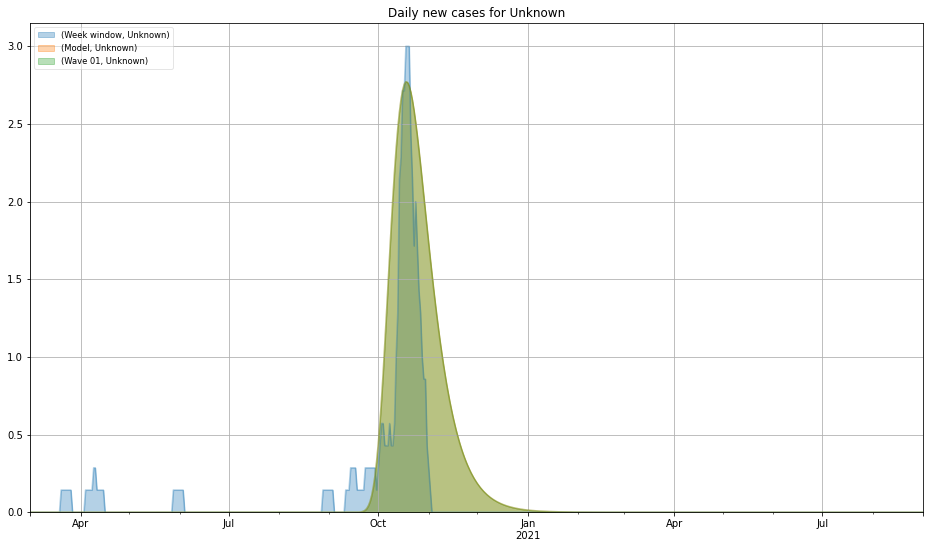

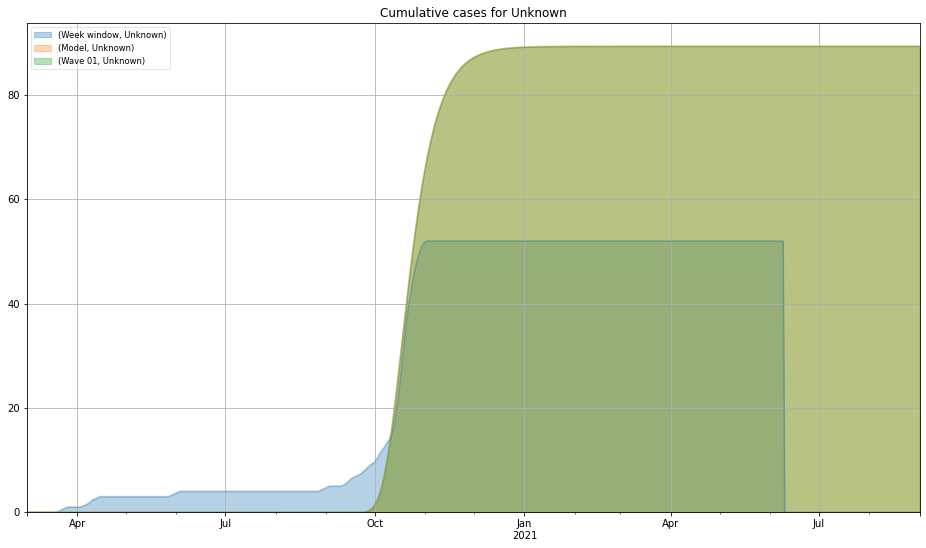

In [11]:
# Select regions to fit.
regions = np.sort(df[region].unique())

# Choose whether to output plots per region.
showplots = True

measure  = cases
smeasure = 'Week window' # smoothed
rmeasure = 'rcases'      # remaining
pmeasure = 'Model'       # predicted
wmeasure = 'Wave '       # waves

for region in regions:

    wave = 1

    df_geo[(pmeasure, region)] = 0
    df_geo[(smeasure, region)] = df_geo[measure][region].loc[:lastdate].rolling(7).mean()
    df_geo[(rmeasure, region)] = df_geo[smeasure][region]

    plotlist = [(smeasure, region), (pmeasure, region)]

    #countryname = df[df['geoId'] == country]['countriesAndTerritories'].iloc[0]
    #popdata = df[df['geoId'] == country]['popData2019'].iloc[0]

    #mincases = popdata / 1e6
    mincases = 2
    #mincases = df_geo[smeasure][country].sum() / 5000
    #mincases = max(popdata / 1e6, 10)

    print('Running multiple wave analysis for \'{}\''.format(region))
    print('Minimum number of cases is {:1.0f}'.format(mincases))

    while True:
        curwave = wmeasure + str((wave) + 1000)[-2:]
        df_geo[(curwave, region)] = 0

        df_pred = pd.DataFrame({'daynum':df_geo['daynum'],
                                measure:df_geo[rmeasure][region]})
        
        df_pred['gumdiv'] = df_pred[measure] / df_pred[measure].cumsum()
        df_pred = df_pred[(df_pred['gumdiv'] > 0) & (df_pred[measure] > mincases)]

        df_pred['linear'] = np.log(df_pred['gumdiv'])

        df_pred = df_pred[(df_pred['linear'] < -8/20) &
                          (df_pred['linear'] > -8/2)]

        if len(df_pred) <= 1:
            print('--- no data left')
            break

        eax = df_pred['daynum'].values.reshape(-1, 1)
        eay = df_pred['linear'].values.reshape(-1, 1)

        #eamodel = Earth()
        #eamodel = Earth(minspan=0)
        eamodel = Earth(minspan=1, penalty=0, endspan=0, thresh=1e-9, check_every=1)
        eamodel.fit(eax, eay)

        df_pred['earth'] = eamodel.predict(eax)

        daymin = df_pred['daynum'].min()
        daymax = df_pred['daynum'].max()

        #df_pred['gbgrad'] = np.gradient(df_pred['linear'])
        #df_pred['eagrad'] = np.gradient(df_pred['earth'])
        df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
        df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)

        fitmod = export.export_python_function(eamodel)

        df_pred['knot'] = ((abs(df_pred['eagrad'] - df_pred['eagrad'].shift(1)) > 1e-6) |
                           (df_pred['daynum'] == (daymin + 1)) |
                           (df_pred['daynum'] == daymax))
        df_pred['daycount'] = df_pred.reset_index().index

        df_knot = df_pred[df_pred['knot']][['daynum', 'daycount', 'eagrad']]
        df_knot['daysdata'] = df_knot['daycount'].shift(-1) - df_knot['daycount']
        df_knot['daystime'] = df_knot['daynum'].shift(-1) - df_knot['daynum']

        df_knot['cand'] = ((df_knot['eagrad'] < -2/80) &
                           (df_knot['daysdata'] >= 3))
        
        df_knot['since'] = df_knot['daynum'] - daymin
        df_knot['score'] = (df_knot['eagrad'] ** 2) * np.sqrt(df_knot['daysdata'] / np.sqrt(df_knot['since']))
        #df_knot['score'] = - df_knot['eagrad'] * df_knot['daysdata']
        df_knot['choice'] = df_knot['score'] == df_knot[df_knot['cand']]['score'].max()

        choice = df_knot[df_knot['choice']]
        if len(choice) == 0:
            print('--- no data for wave')
            break

        lower = choice['daynum'].values[0]
        upper = choice['daysdata'].values[0] + lower

        df_pred = df_pred[(df_pred['daynum'] >= lower) &
                          (df_pred['daynum'] <= upper)].copy()

        slope = (fitmod([[upper]])[0] - fitmod([[lower]])[0]) / (upper - lower)
        intercept = fitmod([[lower]])[0] - (lower * slope)

        beta = - 1 / slope
        mu = beta * (intercept + np.log(beta))

        df_pred['pgumb'] = gumpdf(df_pred['daynum'], beta, mu)
        df_pred['scale'] = df_pred[measure] / df_pred['pgumb']

        final = df_pred['scale'].mean()
        fincv = df_pred['scale'].std() / final

        df_geo[(curwave, region)] = final * gumpdf(df_geo['daynum'], beta, mu)        

        peak = df_geo[df_geo[(curwave, region)] == df_geo[(curwave, region)].max()].index.min()
        start = df_geo[(df_geo[(curwave, region)] >= 1) &
                       (df_geo[(curwave, region)].index < peak)].index.min()
        floor = df_geo[(df_geo[(curwave, region)] < 1) &
                       (df_geo[(curwave, region)].index > peak)].index.min()

        print('{} beta {:6.3f} mu {:3.0f} fit {:5.3f} peak {} from {} to {} size {:1.0f}'.format(
            curwave, beta, mu, (1 - fincv) ** 2, peak.date(), start.date(), floor.date(), final))
       
        df_geo[(pmeasure, region)] += df_geo[(curwave, region)]
        df_geo[(rmeasure, region)] -= df_geo[(curwave, region)]
        plotlist += [(curwave, region)]
        wave += 1
        
    if showplots:
        (
            df_geo
            [plotlist]
            .loc['20200301':'20210901']
            .plot(
                figsize=(16, 9),
                grid=True,
                kind='area',
                stacked=False,
                alpha=1/3,
                title='Daily new cases for '+region,
            )
            .legend(
                loc='upper left',
                fontsize='small',
                framealpha=1/2,
            )
        )
        (
            df_geo
            [plotlist]
            .loc['20200301':'20210901']
            .cumsum()
            .plot(
                figsize=(16, 9),
                grid=True,
                kind='area',
                stacked=False,
                alpha=1/3,
                title='Cumulative cases for '+region,
            )
            .legend(
                loc='upper left',
                fontsize='small',
                framealpha=1/2,
            )
        )

In [12]:
df_out = (
    df_geo
    [pmeasure]
    .melt(
        ignore_index=False,
    )
    .reset_index()
)
df_out.columns = (
    [
        'date',
        'location',
        'value'
    ]
)
(
    df_out
    .to_csv(
        'zzcorggd.csv',
    )
)

Keep exploring! Stay home, wash your hands, keep your distance.